# David Flores

# Introduction

<p> There are many books out in the world and most of them have interesting similarites and differences that can be analyzed even through mathematical computations.</p>
<p> In this project, we will be analyzing the properties of certain books regarding the words that these books contain. Specifically, we will be counting the amount of times a particular word appears in the book. Thus, we may make some observations from the data that we collect. The books we will explore are <i> Around the World in Eighty Days </i> by J.Verne, <i> The Republic </i> by Plato, <i> Little Women </i> by L.M. Alcott, and <i> Gulliver's Travel into Several Remote Regions of the World </i> by J.Swift. </p>
<p> In part one, we will be developing code to calculate the amount of times each word appears in each book. Since we are interested in the frequency of each word, the function will also organize every word by the amount of times it appears, from most to least. However, for this part, we will be focused on the 20 most frequent words that appear in these books. To do this, we will look at some bar graphs displaying the frequencies of each of these 20 words and analyze them. </p>
<p> In part two, we will take a step back and look at each book as a whole and take note of what patterns we see throughout all of the words' frequencies instead of just 20. We will do this with some analysis of some plots as well as a final bar graph </p>

# Body: Code and Analysis

<b> Before we begin, we will import the necessary libraries that we will use for this project. </b> 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Part 1- Most Frequent Words

<p> In this part, we will be defining a function called `WordCount`, which will take a parameter that is a `.txt` file of the books we will be analyzing. This function will go through the `.txt` file (or book) and count how many times each words appears in the book. </p>
<p> The function will do this by going through every word in the book and adding a count for that word. In order to keep track of how many time a word has been counted, the function will create a dictionary where every item is a "key" with a "value" in the format "word": count. The key is the particular word and the value is the count for the word's appearances. As the function goes through every word, it will recognize if the word is in this dictionary. If it is, the function adds 1 to the value, if not, it creates a new key for that word where the value is 1 since it is the first time this word has been counted. Once this is done the words need to organized from most appearances to least. The function will do this using the sorted function. </p>
<p> As an analysis, we will look at the 20 most frequent words that appear for each book. We will do this by creating bar graphs showing how many times each word has been counted. </p>

In [3]:
def WordCount(txtfile):         #define our function with parameter (our txt file)
    allwords = {}               #initiate an empty dictionary
    
    f = open(txtfile,"r")       #open the file of the parameter txtfile
    book = f.read()             #read the file
    f.close()                   #close the file
    
    skip = ".,;:()_-\"?!<>$&*#\n\r[]\{\}" #create a string containing characters that we don't want to be included as a word
    for char in skip:                     #initiate for loop through the characters
        book = book.replace(char," ")     #set the string variable "book" equal to a new string excluding the characters we don't want
                                            #by using the replace function, we replace those characters with a space
    
    book = book.lower()           #uncapitalize every word to avoid miscounts (*ex* and/And)
    words = book.split()          #create a list containing every word in the book
                                    #by using the split function, we seperate a word at every " " (space) and "\n" (new line) characters
    
    for word in words:            #loop through our list of words
        if word in allwords:      #check if this word is a key in the dictionary "allwords"
            allwords[word] += 1     #if so, we add 1 to the value of the word (key), the value represents the count of that word
        else:                     #if word is not in the dictionary as a key
            allwords[word] = 1    #initate a new key for this word where the value (count) is 1
    
    mostcommonKeys = sorted(allwords, key = allwords.get, reverse = True) 
    #use sorted function to sort the words (keys) by values
    #sorted function sorts from least to most so use "reverse = True" to sort from most to least
    
    Sortmostcommon = {}                 #create an empty dictionary
    for w in mostcommonKeys:            #loop through the list of keys that were sorted by value (count)
        Sortmostcommon[w] = allwords[w] #set a new key in our "Sortmostcommon" dictionary 
                                          #with the value that corresponds to the same key from our "allwords" dictionary

    return Sortmostcommon   #return our new sorted dictionary with every words as a key and its count as the value


Now that we have the code, we can create bar graphs to display the 20 most frequent words from each book. Note that our function returns an output that is too large to read since it is returning a dictionary of every possible word. However, since we are working with only 20 words, a bar graph can handle displaying the value of these 20 words. To do this we must call our function for each book and create two lists, one list with the keys (x-axis) and a second list with the values (y-axis). 

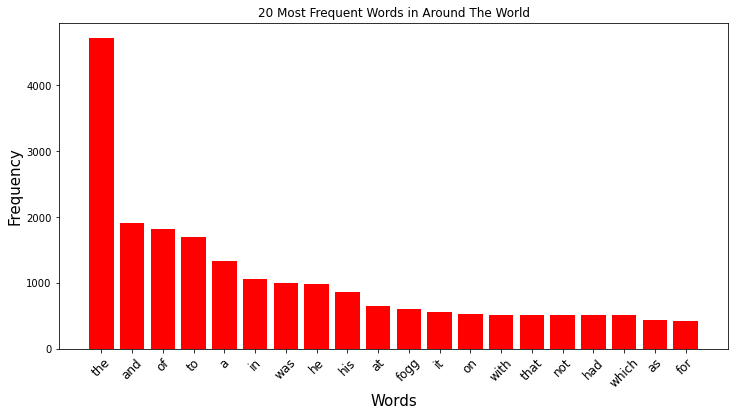

[('the', 4713), ('and', 1909), ('of', 1813), ('to', 1696), ('a', 1329), ('in', 1056), ('was', 1006), ('he', 980), ('his', 858), ('at', 646), ('fogg', 602), ('it', 562), ('on', 529), ('with', 520), ('that', 518), ('not', 518), ('had', 513), ('which', 511), ('as', 441), ('for', 419)]


In [4]:
aroundworld = WordCount("around_world.txt") #set variable equal to the word count for the book "Around The World"
republic = WordCount("republic.txt")        #set variable equal to the word count for the book "The Republic"
little = WordCount("little.txt")            #set variable equal to the word count for the book "Little Women"
gulliver = WordCount("gulliver.txt")        #set variable equal to the word count for the book "Gulliver's Travel"
#each variable calls the function WordCount to count the frequencies of every word for the corresponding book

plt.figure(figsize=(12,6)) #size the figure
plt.bar(list(aroundworld.keys())[:20], list(aroundworld.values())[:20],color="r") 
#create bar plot, list all of the keys (words), first 20 keys on x-axis, list all of the values (counts), first 20 values on y-axis

plt.xticks(rotation=45, size = 12) #rotate the x variable labels 45 degrees
plt.xlabel("Words", size = 15)     #label x-axis
plt.ylabel("Frequency", size = 15) #label y-axis
plt.title("20 Most Frequent Words in Around The World") #set title
plt.show();
#this bar plot is for the book "Around The World", we will se bar plots for the other books afterward

print(list(aroundworld.items())[:20])   #print a list of the 20 words with their counts each in a seperate group


<p> Above, we can see a bar graph of the frequencies of the 20 most common words for the book <i> Around The World in Eighty Days </i>. It may be hard to see what the actual count is for these words so below the bar graph, there is a list of the actual values corresponding to the word. Right away, we can see that the word "the" is used significantly more than all of the other words in this book. It is no surprise that the most common words are articles, conjuctions or prepositions. These are words that can appear in multiple sentences, multiple times. </p>
<p> However, we also notice that the words "he" and "his" are a part of the top 20. It is likely that this book is from the third person point of view talking about a male character. We can see that the word "fogg" appears a lot as well, but this isn't really considered a word, thus it may be a name for someone or something. With these observations, perhaps this book talks about the travels of a man with the name Fogg. </p>
Now let's observe and analyze the other books.

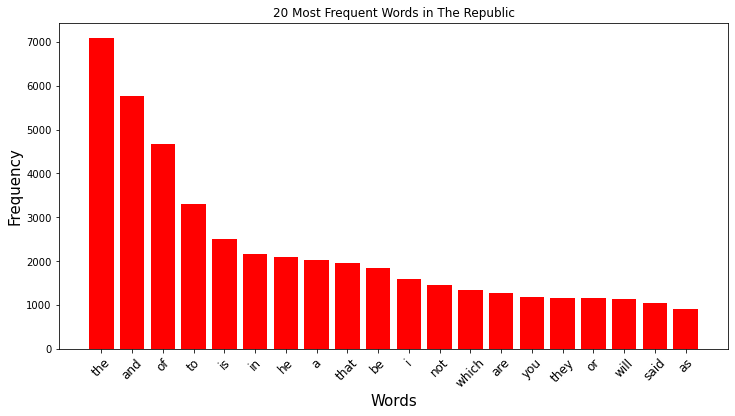

[('the', 7081), ('and', 5755), ('of', 4663), ('to', 3297), ('is', 2514), ('in', 2157), ('he', 2094), ('a', 2018), ('that', 1960), ('be', 1841), ('i', 1585), ('not', 1462), ('which', 1339), ('are', 1278), ('you', 1176), ('they', 1159), ('or', 1153), ('will', 1139), ('said', 1047), ('as', 919)]


In [5]:
#the process for creating the following graphs will be the same

plt.figure(figsize=(12,6))
plt.bar(list(republic.keys())[:20],list(republic.values())[:20],color="r")
plt.xticks(rotation=45, size = 12) 
plt.xlabel("Words", size = 15)     
plt.ylabel("Frequency", size = 15) 
plt.title("20 Most Frequent Words in The Republic") 
plt.show();
#this bar plot is for the book "The Republic"
print(list(republic.items())[:20])


<p> Above, we have the 20 most frequent words for the book <i> The Republic </i>. Just like the previous book, the word "the" seems to appear the most in this book as well, except that it is not as significantly more frequent than the word "and". However, the words "the" and "and" appear much more than in the previous book. Therefore, it may be possible that this book has more words in total than the previous book. </p>
<p> Another thing we see is that the word "I" appears in this list of 20. This may mean that this book could be in the first person. We also see the words "you", "he", "they" and "said". The word "said" may indicate that there is a great amount of dialogue. If we include the others, we can assume there may be a group of characters and that "he" (a male character or characters depeding on who "he" refers to) may have a significant role or roles.

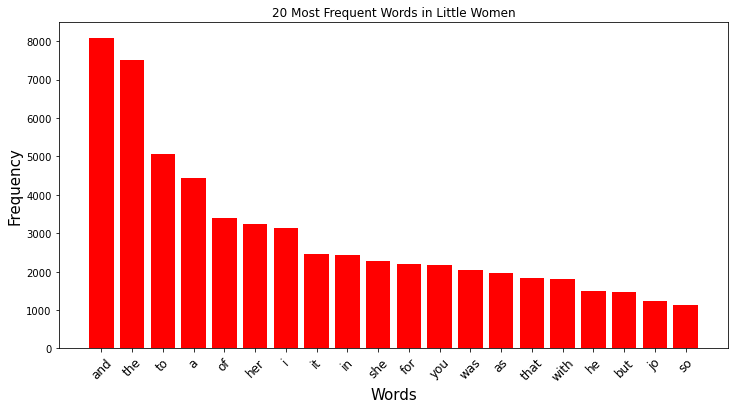

[('and', 8087), ('the', 7502), ('to', 5067), ('a', 4451), ('of', 3404), ('her', 3240), ('i', 3147), ('it', 2454), ('in', 2443), ('she', 2281), ('for', 2205), ('you', 2180), ('was', 2034), ('as', 1967), ('that', 1830), ('with', 1806), ('he', 1501), ('but', 1464), ('jo', 1248), ('so', 1132)]


In [6]:
plt.figure(figsize=(12,6))
plt.bar(list(little.keys())[:20],list(little.values())[:20],color="r")
plt.xticks(rotation=45, size = 12)
plt.xlabel("Words", size = 15) 
plt.ylabel("Frequency", size = 15)
plt.title("20 Most Frequent Words in Little Women")
plt.show();
#this bar plot is for the book "Little Women"

print(list(little.items())[:20])


<p> Above, we have a graph of the 20 most frequent words for the book <i> Little Women </i>. This time, the word "and" is the most common word rather than the word "the" and these two are much more frequent in this book than in the previous two. Without knowing the title of the book, if we note from the graph and data that the words "her" and "she" appear a lot, we may assume that a woman or women are more present in this book than men. Although, the word "he" appears in this list of 20, so a man or men may still have a significant role. </p>
<p> Just like in the first book, we notice a name in the top 20 words, which is "Jo". We also see that the word "I" appears a lot as well. Therefore, we can assume that this book may be in the first person point of view, with Jo as either the main character or a significant character towards the main character. 

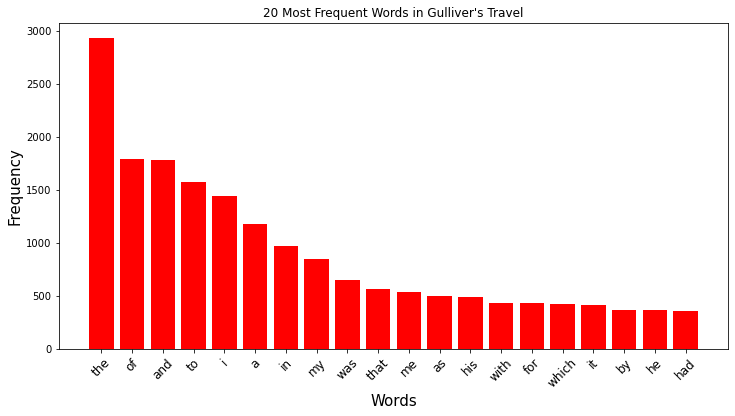

[('the', 2931), ('of', 1787), ('and', 1784), ('to', 1579), ('i', 1443), ('a', 1182), ('in', 970), ('my', 845), ('was', 654), ('that', 569), ('me', 541), ('as', 498), ('his', 491), ('with', 432), ('for', 429), ('which', 426), ('it', 417), ('by', 371), ('he', 368), ('had', 354)]


In [7]:
plt.figure(figsize=(12,6))
plt.bar(list(gulliver.keys())[:20],list(gulliver.values())[:20],color="r")
plt.xticks(rotation=45, size = 12)
plt.xlabel("Words", size = 15) 
plt.ylabel("Frequency", size = 15)
plt.title("20 Most Frequent Words in Gulliver's Travel")
plt.show();
#this bar plot is for the book "Gulliver's Travel"

print(list(gulliver.items())[:20])


<p> Above, we have the graph of the 20 most frequent words for the book <i> Gulliver's Travel into Several Remote Regions of the World </i>. Now, the word "the" is back to being number one of most frequent words. We also notice that the count for these words is not as much compared to the previous books. </p>
<p> Again, we notice that the word "I" appears in this list. However, the word "me" and "my" appear in this list this time, which means that, more likely than not, the narration is in the first person point of view. We also see that the words "his" and "he" appear in this list, so we can assume that there is a male character significant to the main character. </p>

We have seen bar graphs and data for each book, now let's look at them put together. The code below puts all the bar graphs from above as subplots so that we can view each bar graph close together. Below these graphs, we will also print the list of the frequencies for the 20 words for each book.

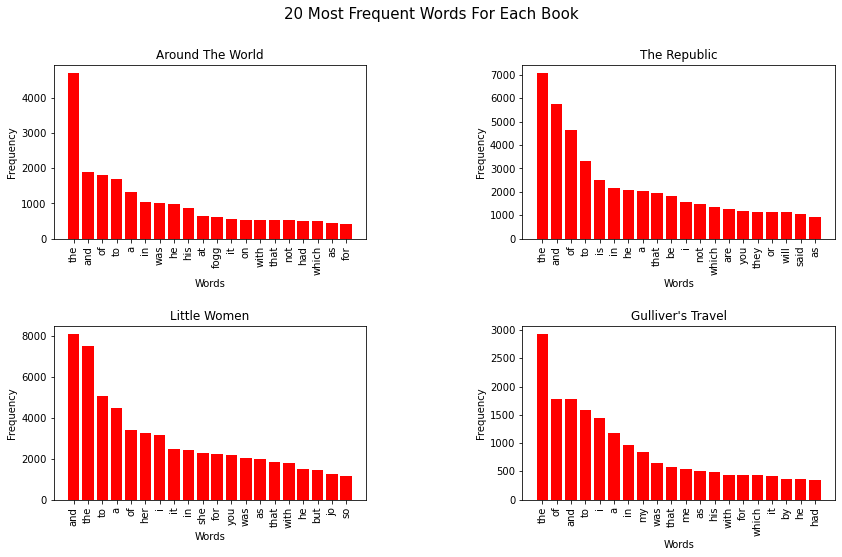

Around The World:  [4713, 1909, 1813, 1696, 1329, 1056, 1006, 980, 858, 646, 602, 562, 529, 520, 518, 518, 513, 511, 441, 419]
The Republic:  [7081, 5755, 4663, 3297, 2514, 2157, 2094, 2018, 1960, 1841, 1585, 1462, 1339, 1278, 1176, 1159, 1153, 1139, 1047, 919]
Little Women:  [8087, 7502, 5067, 4451, 3404, 3240, 3147, 2454, 2443, 2281, 2205, 2180, 2034, 1967, 1830, 1806, 1501, 1464, 1248, 1132]
Gulliver's Travel:  [2931, 1787, 1784, 1579, 1443, 1182, 970, 845, 654, 569, 541, 498, 491, 432, 429, 426, 417, 371, 368, 354]


In [8]:
plt.figure(figsize=(14,8))
plt.subplots_adjust(wspace=0.5,hspace=0.5) #adjust the spacing of the subplots

plt.subplot(2,2,1)  #create subplot (2x2) position 1 (top left)
plt.bar(list(aroundworld.keys())[:20],list(aroundworld.values())[:20],color="r")
plt.xticks(rotation=90, size = 10)
plt.xlabel("Words", size = 10) 
plt.ylabel("Frequency", size = 10)
plt.title("Around The World")

plt.subplot(2,2,2)  #position 2 (top right)
plt.bar(list(republic.keys())[:20],list(republic.values())[:20],color="r")
plt.xticks(rotation=90, size = 10)
plt.xlabel("Words", size = 10) 
plt.ylabel("Frequency", size = 10) 
plt.title("The Republic")

plt.subplot(2,2,3)  #position 3 (bottom left)
plt.bar(list(little.keys())[:20],list(little.values())[:20],color="r")
plt.xticks(rotation=90, size = 10)
plt.xlabel("Words", size = 10) 
plt.ylabel("Frequency", size = 10) 
plt.title("Little Women") 

plt.subplot(2,2,4)  #position 4 (bottom right)
plt.bar(list(gulliver.keys())[:20],list(gulliver.values())[:20],color="r")
plt.xticks(rotation=90, size = 10)
plt.xlabel("Words", size = 10) 
plt.ylabel("Frequency", size = 10) 
plt.title("Gulliver's Travel")

plt.suptitle("20 Most Frequent Words For Each Book", size = 15) #set a main title for the entire figure
plt.show();

#print values (counts) for the 20 words for each book
print("Around The World: ", list(aroundworld.values())[:20])
print("The Republic: ", list(republic.values())[:20])
print("Little Women: ", list(little.values())[:20])
print("Gulliver's Travel: ", list(gulliver.values())[:20])


This is just a better view to be able to look at all the graphs and data together. If you look at each graph one by one you may miss some interesting observations. For example, the frequencies for all 20 words in <i> Little Women </i> do not go below 1000, compared to <i> Gulliver's Travel </i> which has only 6 words that have frequencies above 1000 and only the one above 2000. Perhaps the book with most amount of words is <i> Little Women </i> and the book with the least amount of words is <i> Gulliver's Travel </i>.

## Part 2- Analyzing all words

In this part, we will take a step back and look at each book as a whole. We will make observations for two kinds of analysis. First we will develop code that will look at the decay that the frequencies for all words have in each book. Basically, the question is: At what rate are frequencies decreasing by? The function `logplot` take parameters x, y and t, where x is the range of y, y is the list of frequencies of every word for the book, and t is the title of the book. The function will check what kind of decay each list has. 

In [9]:
y1 = list(aroundworld.values()) #set y variable to list of frequencies of all words for the book "Around The World"
y2 = list(republic.values())    #set y variable to list of frequencies of all words for the book "The Republic"
y3 = list(little.values())      #set y variable to list of frequencies of all words for the book "Little Women"
y4 = list(gulliver.values())    #set y variable to list of frequencies of all words for the book "Gulliver's Travel"

x1 = range(len(y1)) #set x variable to range of corresponding y variable
x2 = range(len(y2))
x3 = range(len(y3))
x4 = range(len(y4))

def logplot(x,y,t=""):            #define logplot function taking 3 parameters: x, y, and t

    plt.figure(figsize=(16,6))    #set figure size
    plt.subplot(141)              #create subplot
    plt.plot(x,y)                 #plot x vs y
    plt.title("x ; y")            #set plot title
    plt.subplot(142)              
    plt.plot(np.log(x),y)         #plot log(x) vs y
    plt.title("log-x ; y")        
    plt.subplot(143)
    plt.plot(x,np.log(y))         #plot x vs log(y)
    plt.title("x ; log-y")
    plt.subplot(144)
    plt.plot(np.log(x),np.log(y)) #plot log(x) vs log(y)
    plt.title("log-x ; log-y")
    
    plt.suptitle(t)   #set main title for entire figure

    return None    #no return

If the decay has a similar relationship of a particular function, then the plot should show a linear decrease according to these rules:
<p> 1) If the decay is linear, then the first and last plots should show a linear decrease </p>
<p> 2) If the decay is logarithmic, then only the second plot should show a linear decrease </p>
<p> 3) If the decay is exponential, then only the third plot should show a linear decrease </p>
<p> 4) If the decay is 1/polynomial, then only the last plot should show a linear decrease </p>

We would check the decay for a polynomial, but there would have to be an increase, but there won't be an increase in any case since the lists are ordered to be decreasing.

<ipython-input-9-2efc01931bcd>:18: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(x),y)         #plot log(x) vs y
<ipython-input-9-2efc01931bcd>:24: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(x),np.log(y)) #plot log(x) vs log(y)


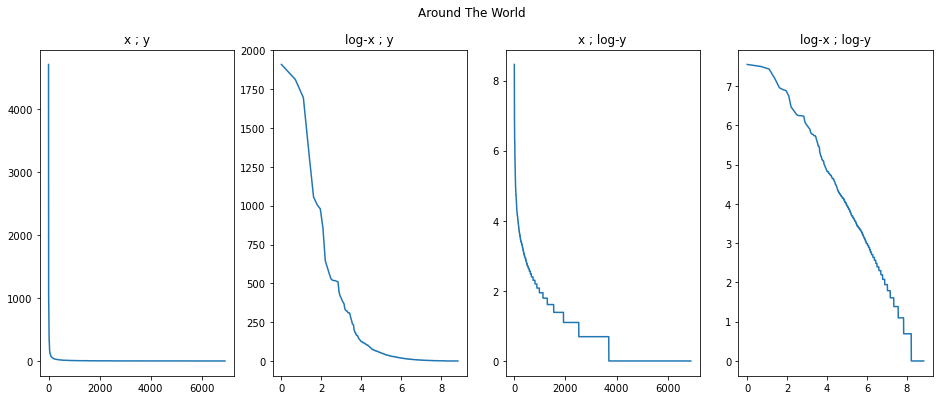

In [10]:
logplot(x1,y1,"Around The World"); #call logplot function to check the four plots and see what rule is satisfied

The above plots show the decreasing relationships for each check. Only the last plot shows a linear like decrease, which means that the decrease in the frequencies for the words in <i> Around The World </i> is similar to $\frac{1}{x}$.

<ipython-input-9-2efc01931bcd>:18: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(x),y)         #plot log(x) vs y
<ipython-input-9-2efc01931bcd>:24: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(x),np.log(y)) #plot log(x) vs log(y)


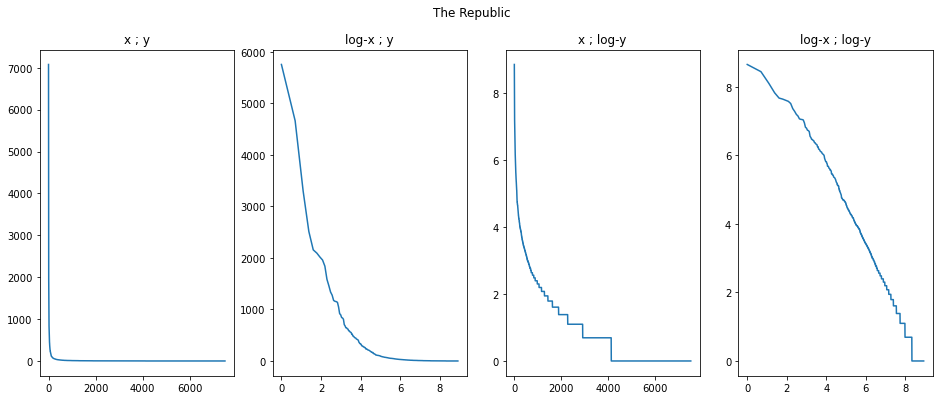

In [11]:
logplot(x2,y2,"The Republic");

Here we see that the relationship for the decrease in frequencies for all words in <i> The Republic </i> is also similar to $\frac{1}{x}$.

<ipython-input-9-2efc01931bcd>:18: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(x),y)         #plot log(x) vs y
<ipython-input-9-2efc01931bcd>:24: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(x),np.log(y)) #plot log(x) vs log(y)


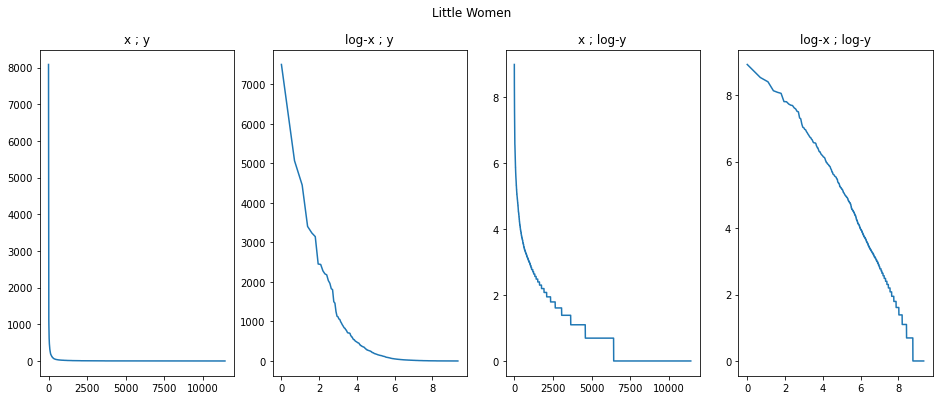

In [12]:
logplot(x3,y3,"Little Women");

Again the decrease for <i> Little Women </i> is also similar to $\frac{1}{x}$.

<ipython-input-9-2efc01931bcd>:18: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(x),y)         #plot log(x) vs y
<ipython-input-9-2efc01931bcd>:24: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(x),np.log(y)) #plot log(x) vs log(y)


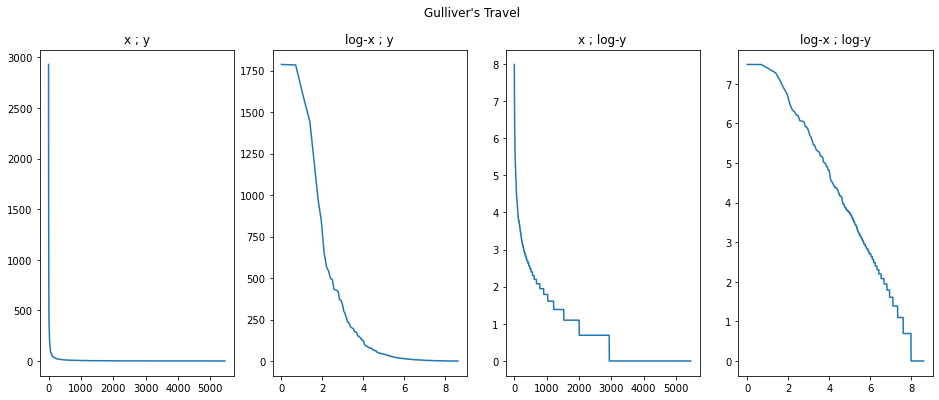

In [13]:
logplot(x4,y4,"Gulliver's Travel");

And finally, the decreasing relationship for <i> Gulliver's Travel </i> is also similar to $\frac{1}{x}$.

Books are not always considered similar regarding their relevance. However, with some mathematical computing, we notice that even books with different levels of word counts for different words, have similar patterns of decreasing frequencies.

We will use a bar graph one last time to show the different levels of total words in each book. Earlier, we made some assumptions that some books may have more words than other according to the frequencies of the top 20 words. The code below will sum up all of the word frequencies for each book. 

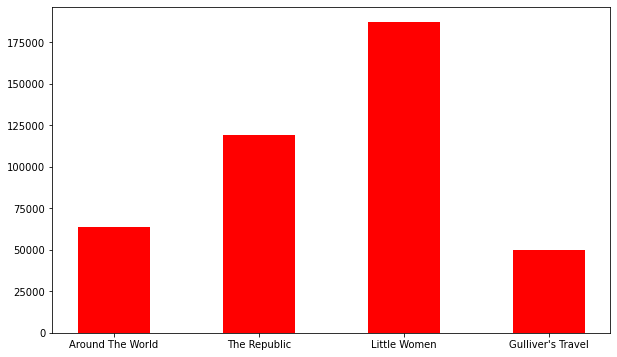

{'Around The World': 63861, 'The Republic': 119188, 'Little Women': 186922, "Gulliver's Travel": 50045}


In [14]:
totalwordsEach = {"Around The World":sum(y1), "The Republic":sum(y2), "Little Women":sum(y3), "Gulliver's Travel":sum(y4)} 
#create a dictionary with books as keys and the total number of words as values for the corresponding book

plt.figure(figsize=(10,6)) #set figure size
plt.bar(list(totalwordsEach.keys()), list(totalwordsEach.values()),color="r", width=0.5) 
#plot bar graph where x-axis are the books (keys) and y-axis is the amount of words for that book (values)
plt.show();

print(totalwordsEach) #print dictionary to see actual values

As a whole, we can now see the total number of words in each of these books. As we assumed, <i> Little Women </i> does have the most words, <i> The Republic </i> has the second most, <i> Around The World </i> has the third most and <i> Gulliver's Travel</i> has the least. The difference in words for some of these books is significant, yet they all have that same decay in frequencies of $\frac{1}{x}$

# Conclusion

<p> We have seen many patterns, made many observations through data, bar graphs and plots and analyzed the characteristics of the four books <i> Around the World in Eighty Days </i> by J.Verne, <i> The Republic </i> by Plato, <i> Little Women </i> by L.M. Alcott, and <i> Gulliver's Travel into Several Remote Regions of the World </i> by J.Swift. Specifically with some mathematical computations. </p>
<p> We have noted the similarities and differences of these books regarding what words were in the top 20 of most frequent. Some of the words that were in these top 20 lists allowed us to even deduce what kind of book we may be looking at. Some were considered in the first person since we saw words like "I" and "me", others in the third person. Some had significant names like <i> Little Women </i> with Jo, while others did not have any names as most frequent. </p>
<p> We have also looked at each book as a whole by looking at the decay of the frequencies of all words. Turns out that all four of these books have the same decay of $\frac{1}{x}$. Even when looking at the total amount of words, where <i> Little Women </i> had significantly more words than <i> Gulliver's Travel </i>, both still had that same decay. </p>